In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kidney_disease.csv")
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
# ID column is of no sense so we are deleting it
# In any analysis always try to drop this columns

df.drop('id', axis = 1, inplace = True)

In [6]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
# Renaming the column name 

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [9]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

Insight 
1. The count of each column is different >> There should be some missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Insight

1. The datatype of white_blood_cell_count & red_blood_cell_count is object but it should not
2. The datatype of packed_cell_volume is also object but it should not

In [13]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

Insight

1. Due to \t43 value in the column, the datatype is object. We have to convert it to numeric values to make the datatype of the column as int or float

To convert to numeric, use pd.to_numeric, suppress the error and convert to nan

In [15]:
#coerce >> suppress or ignore

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')   

In [16]:
df['packed_cell_volume'].dtype

dtype('float64')

In [17]:
# All string character converted to NAN

df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [18]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [19]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')   

In [20]:
df['white_blood_cell_count'].dtype

dtype('float64')

In [21]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')   

In [22]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

In [23]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [24]:
#Separate Object and non object column 

# For Categorical Columns 
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

#For Numerical Columns 
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [25]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [26]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [27]:
#Unique values for all the dataframe of the database

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [28]:
#Remove irrelevant options

df['diabetes_mellitus'].replace(to_replace = {' yes': 'yes', '\tyes': 'yes', '\tno': 'no'}, inplace = True)

In [29]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [30]:
#Remove irrelevant options

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = {'\tno': 'no'})

In [31]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [32]:
#Remove irrelevant options by changing the unique otions to numerical format

df['class'] = df['class'].map({'ckd':1, 'notckd':0, 'ckd\t':1})

In [33]:
df['class'].unique()

array([1, 0], dtype=int64)

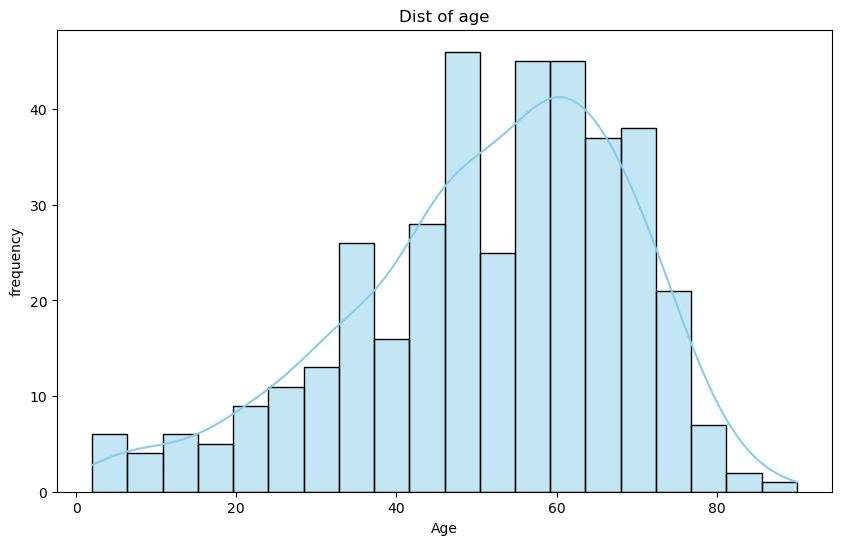

In [34]:
#Univariate Analysis

plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, bins = 20, color = 'skyblue')
plt.title('Dist of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

Insighst
1. dist of age is right skewed

<Axes: xlabel='hypertension', ylabel='count'>

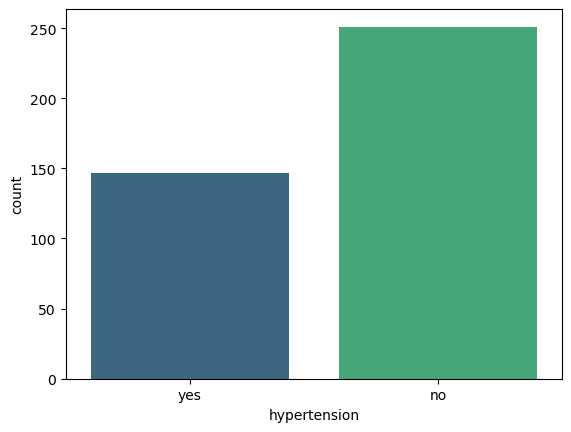

In [36]:
#Check how many suffer with hypertension

sns.countplot(x = 'hypertension', data = df, palette = 'viridis')

<Axes: xlabel='class', ylabel='blood_urea'>

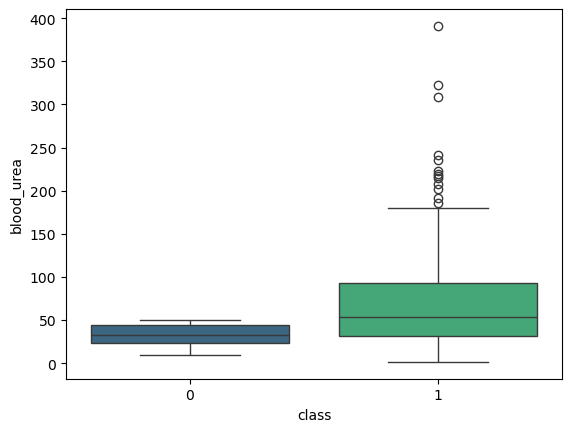

In [37]:
sns.boxplot(x = 'class', y = 'blood_urea', data = df, palette = 'viridis')

Insights
1. People with kidney disease has higher blood_urea with outliers
2. Medium value is also higher


<Axes: xlabel='class', ylabel='serum_creatinine'>

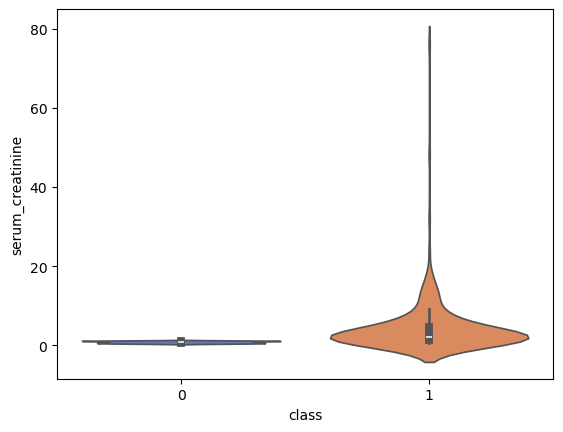

In [39]:
#To detect the outlier we can also use violinplot

sns.violinplot(x = 'class', y = 'serum_creatinine', data = df, palette = "muted")

<Axes: xlabel='aanemia', ylabel='count'>

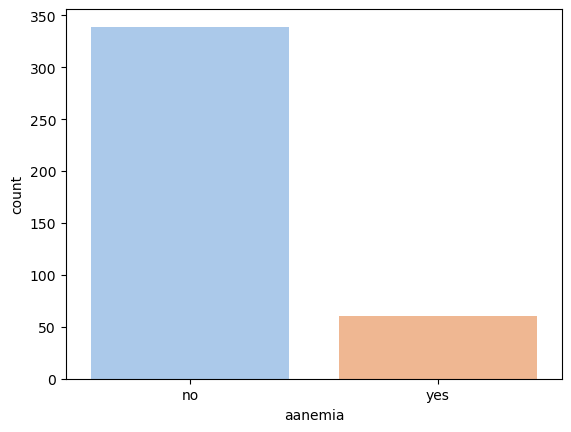

In [40]:
sns.countplot(x = 'aanemia', data = df, palette = 'pastel')

Insights 

1. Majority of people not suffering from anemia

<Axes: ylabel='count'>

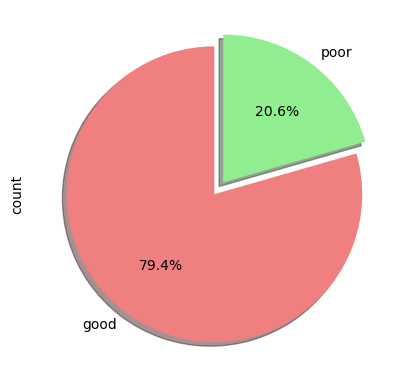

In [42]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0, 0.1), startangle = 90, shadow = True)

Insights

1. 79.4% of people have good appetite

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

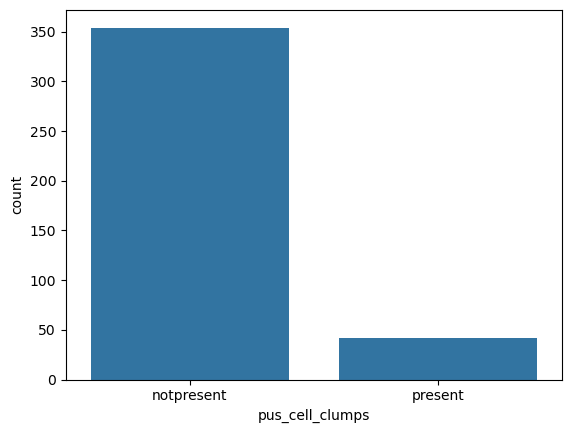

In [44]:
sns.countplot(x = 'pus_cell_clumps', data = df)

Insights 

1. Majority of people does not have pus_cell_clumps

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

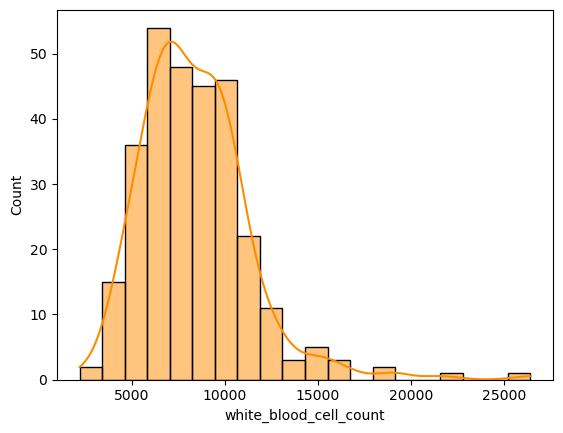

In [46]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins = 20, kde = True, color = 'darkorange')

<Axes: ylabel='count'>

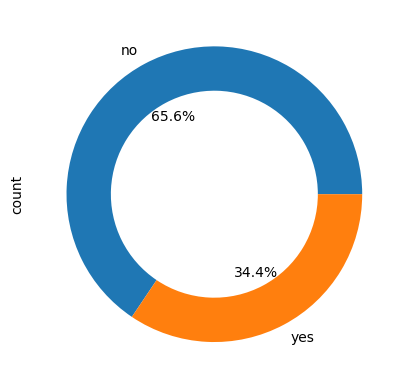

In [47]:
#donut chart or ring chart 
#created by specifying wedgeprops >> Used to display proportions


df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width=0.3))

Insights

1. 34.4% people is suffering from diabetes_mellitus

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

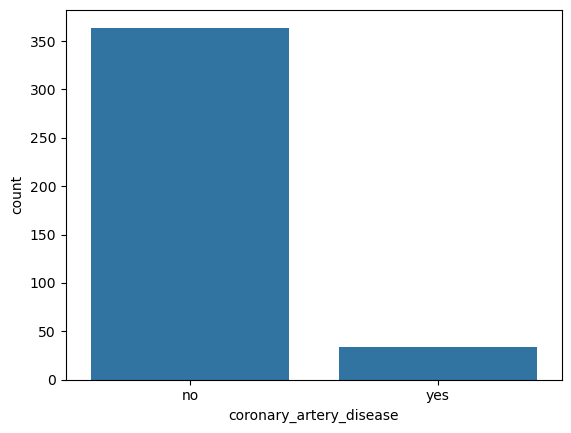

In [49]:
sns.countplot(x = 'coronary_artery_disease', data = df)


Insights 

1. Majority of people doent have coronary_artery_disease

<Axes: xlabel='peda_edema', ylabel='count'>

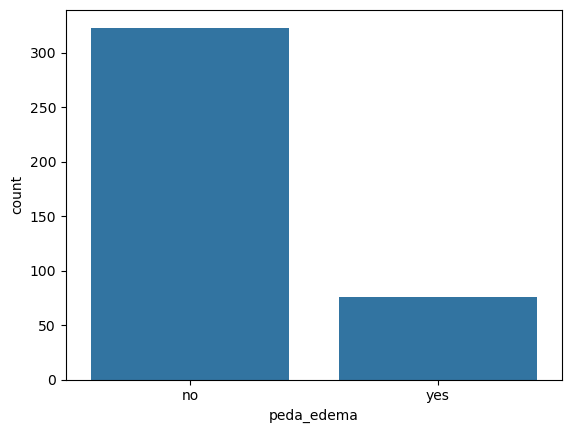

In [51]:
sns.countplot(x = 'peda_edema', data = df)

<Axes: xlabel='bacteria', ylabel='count'>

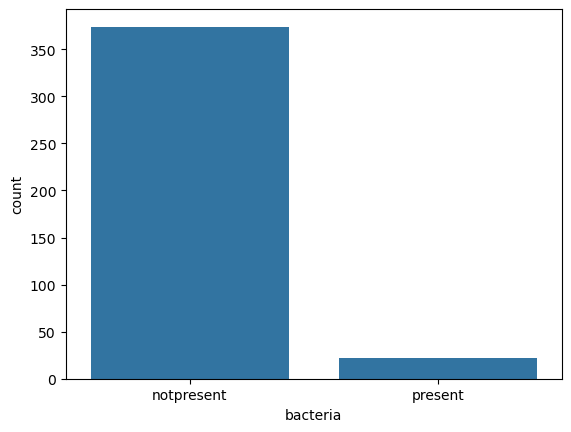

In [94]:
sns.countplot(x = 'bacteria', data=df)

Text(0.5, 1.0, 'Age VS Blood Pressure')

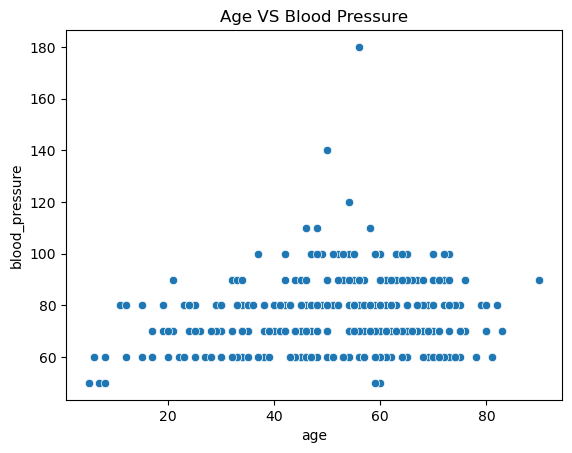

In [100]:
# All above were univariate analysis >> 1 feature at a time

# Now starting Bivariate Analysis

# Bivariate Analysis >> 2 feature at a time

sns.scatterplot(x='age', y = 'blood_pressure', data = df)
plt.title("Age VS Blood Pressure")

Insight 
1. As age is increasing, blood pressure is also increasing

Text(0.5, 1.0, 'Age VS Blood Pressure')

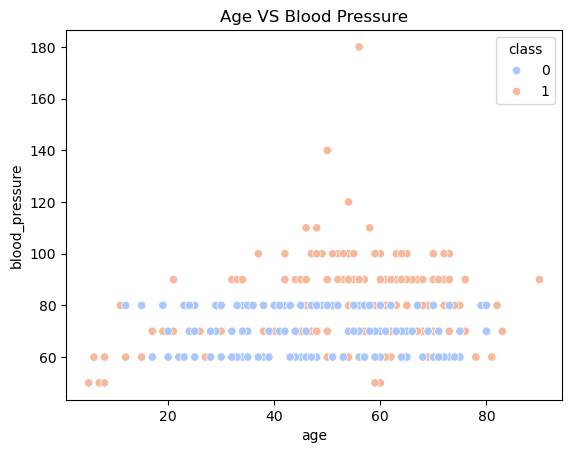

In [109]:
sns.scatterplot(x='age', y = 'blood_pressure', data = df, hue = 'class', palette = 'coolwarm')
plt.title("Age VS Blood Pressure")

Text(0.5, 1.0, 'Diabetes_mellitus VS Albumin')

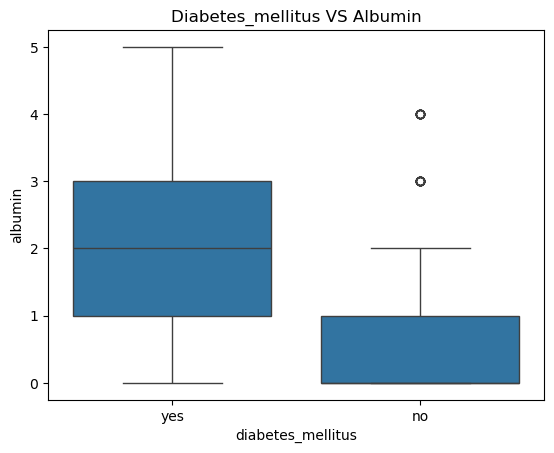

In [115]:
sns.boxplot(x = 'diabetes_mellitus', y='albumin', data = df)
plt.title("Diabetes_mellitus VS Albumin")

Insights

1. People who do not have diabities has some outlier

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

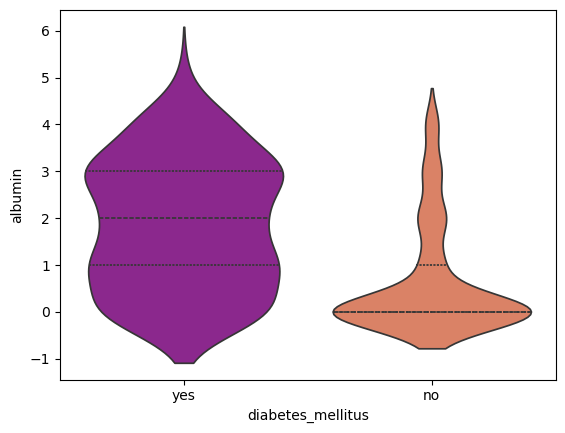

In [131]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data =df, palette = 'plasma', inner= 'quartile')

Insight

1. Since the shape of the 2nd plot is stretched, this shows that it consists of outlier

In [135]:
#Stacked Bar Chart 

#Summarizing the data
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])  #crosstab summarises data

hypertension        no  yes
diabetes_mellitus          
no                 220   41
yes                 31  106

Text(0.5, 1.0, 'Diabetes_mellitus VS Hypertension')

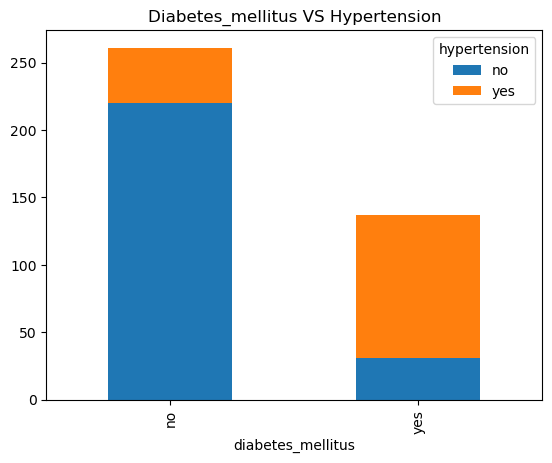

In [151]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)
plt.title("Diabetes_mellitus VS Hypertension")

In [ ]:
Insights



Text(0.5, 1.0, 'Diabetes_mellitus VS Hypertension')

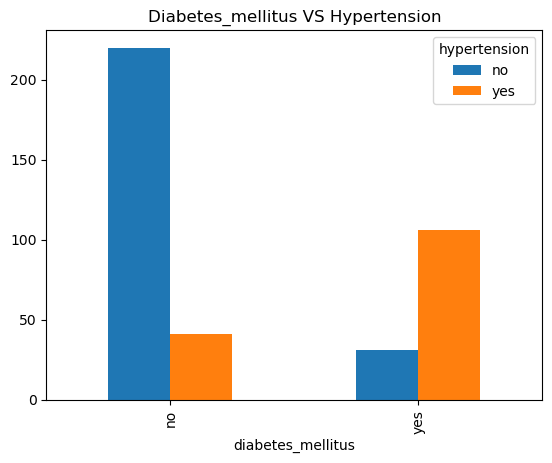

In [153]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = False)
plt.title("Diabetes_mellitus VS Hypertension")

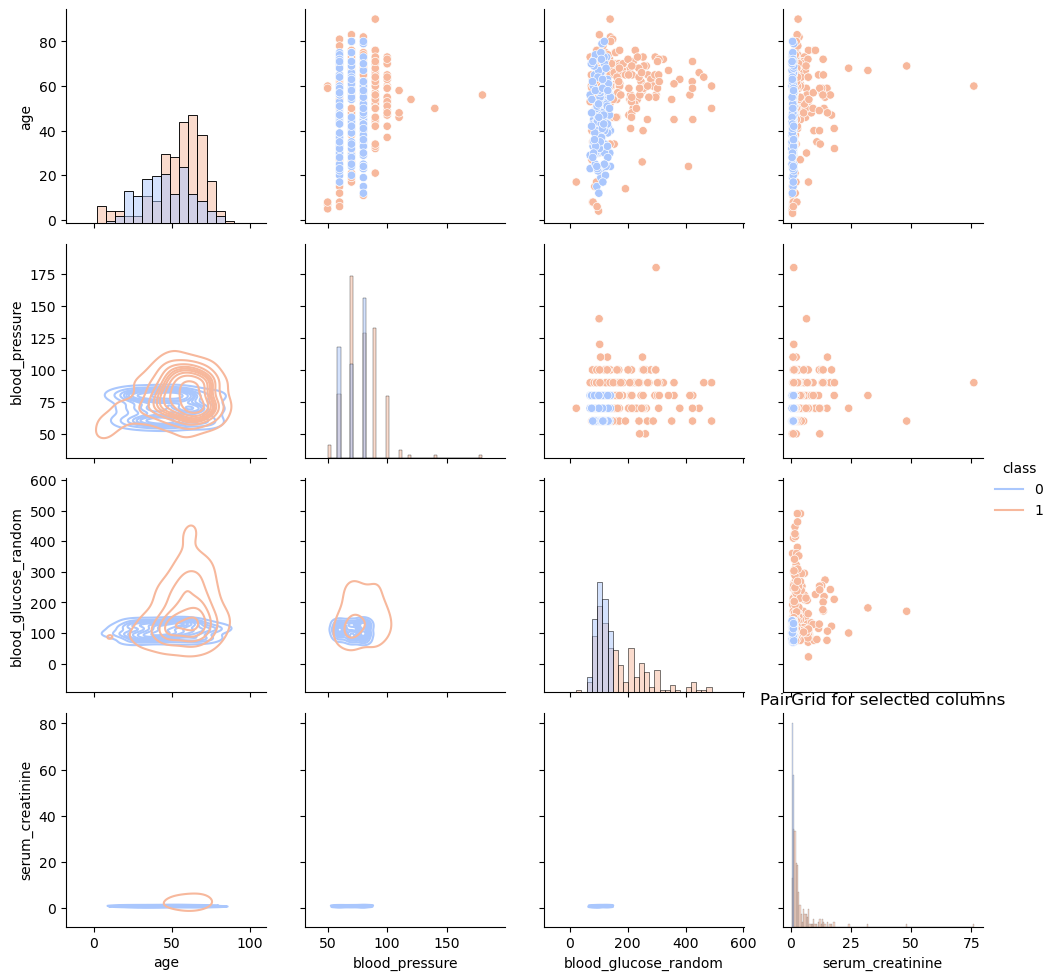

In [155]:
#Multivariate Analysis 

cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

g = sns.PairGrid(df[cols], hue='class', palette = 'coolwarm')
g.map_upper(sns.scatterplot) # Upper Corner Plot
g.map_lower(sns.kdeplot, cmap = 'Blues_d') #Lower Corner Plot
g.map_diag(sns.histplot) #diagonal Plot
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

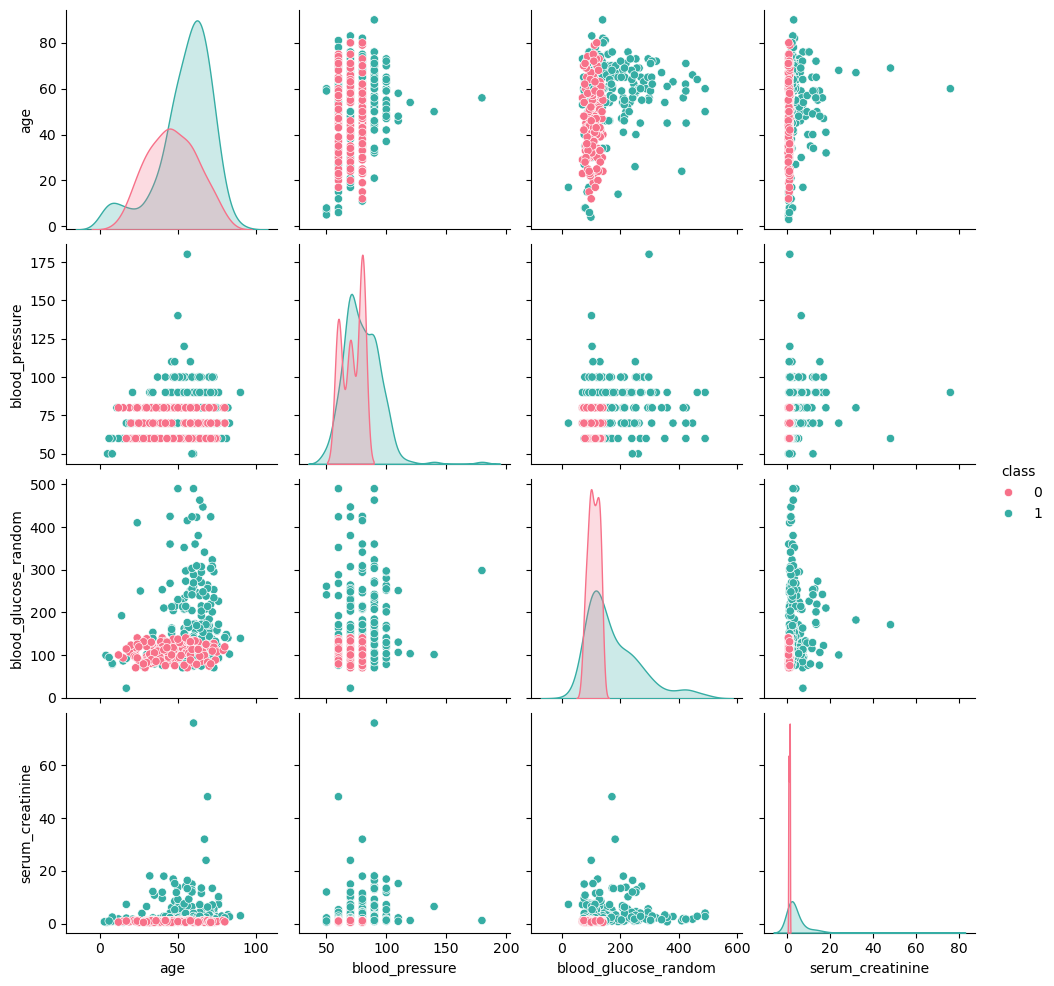

In [157]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

In [159]:
df.corr(numeric_only=True)

age  blood_pressure  specific_gravity   albumin  \
age                     1.000000        0.159480         -0.191096  0.122091   
blood_pressure          0.159480        1.000000         -0.218836  0.160689   
specific_gravity       -0.191096       -0.218836          1.000000 -0.469760   
albumin                 0.122091        0.160689         -0.469760  1.000000   
sugar                   0.220866        0.222576         -0.296234  0.269305   
blood_glucose_random    0.244992        0.160193         -0.374710  0.379464   
blood_urea              0.196985        0.188517         -0.314295  0.453528   
serum_creatinine        0.132531        0.146222         -0.361473  0.399198   
sodium                 -0.100046       -0.116422          0.412190 -0.459896   
potassium               0.058377        0.075151         -0.072787  0.129038   
haemoglobin            -0.192928       -0.306540          0.602582 -0.634632   
packed_cell_volume     -0.242119       -0.326319          0.603560 -0.611891   
white_blood_cell_count  0.118339        0.029753         -0.236215  0.231989   
red_blood_cell_count   -0.268896       -0.261936          0.579476 -0.566437   
class                   0.227268        0.294077         -0.732163  0.627090   

                           sugar  blood_glucose_random  blood_urea  \
age                     0.220866              0.244992    0.196985   
blood_pressure          0.222576              0.160193    0.188517   
specific_gravity       -0.296234             -0.374710   -0.314295   
albumin                 0.269305              0.379464    0.453528   
sugar                   1.000000              0.717827    0.168583   
blood_glucose_random    0.717827              1.000000    0.143322   
blood_urea              0.168583              0.143322    1.000000   
serum_creatinine        0.223244              0.114875    0.586368   
sodium                 -0.131776             -0.267848   -0.323054   
potassium               0.219450              0.066966    0.357049   
haemoglobin            -0.224775             -0.306189   -0.610360   
packed_cell_volume     -0.239189             -0.301385   -0.607621   
white_blood_cell_count  0.184893              0.150015    0.050462   
red_blood_cell_count   -0.237448             -0.281541   -0.579087   
class                   0.344070              0.419672    0.380605   

                        serum_creatinine    sodium  potassium  haemoglobin  \
age                             0.132531 -0.100046   0.058377    -0.192928   
blood_pressure                  0.146222 -0.116422   0.075151    -0.306540   
specific_gravity               -0.361473  0.412190  -0.072787     0.602582   
albumin                         0.399198 -0.459896   0.129038    -0.634632   
sugar                           0.223244 -0.131776   0.219450    -0.224775   
blood_glucose_random            0.114875 -0.267848   0.066966    -0.306189   
blood_urea                      0.586368 -0.323054   0.357049    -0.610360   
serum_creatinine                1.000000 -0.690158   0.326107    -0.401670   
sodium                         -0.690158  1.000000   0.097887     0.365183   
potassium                       0.326107  0.097887   1.000000    -0.133746   
haemoglobin                    -0.401670  0.365183  -0.133746     1.000000   
packed_cell_volume             -0.404193  0.376914  -0.163182     0.895382   
white_blood_cell_count         -0.006390  0.007277  -0.105576    -0.169413   
red_blood_cell_count           -0.400852  0.344873  -0.158309     0.798880   
class                           0.299969 -0.375674   0.084541    -0.768919   

                        packed_cell_volume  white_blood_cell_count  \
age                              -0.242119                0.118339   
blood_pressure                   -0.326319                0.029753   
specific_gravity                  0.603560               -0.236215   
albumin                          -0.611891                0.231989   
sugar                       

<Axes: >

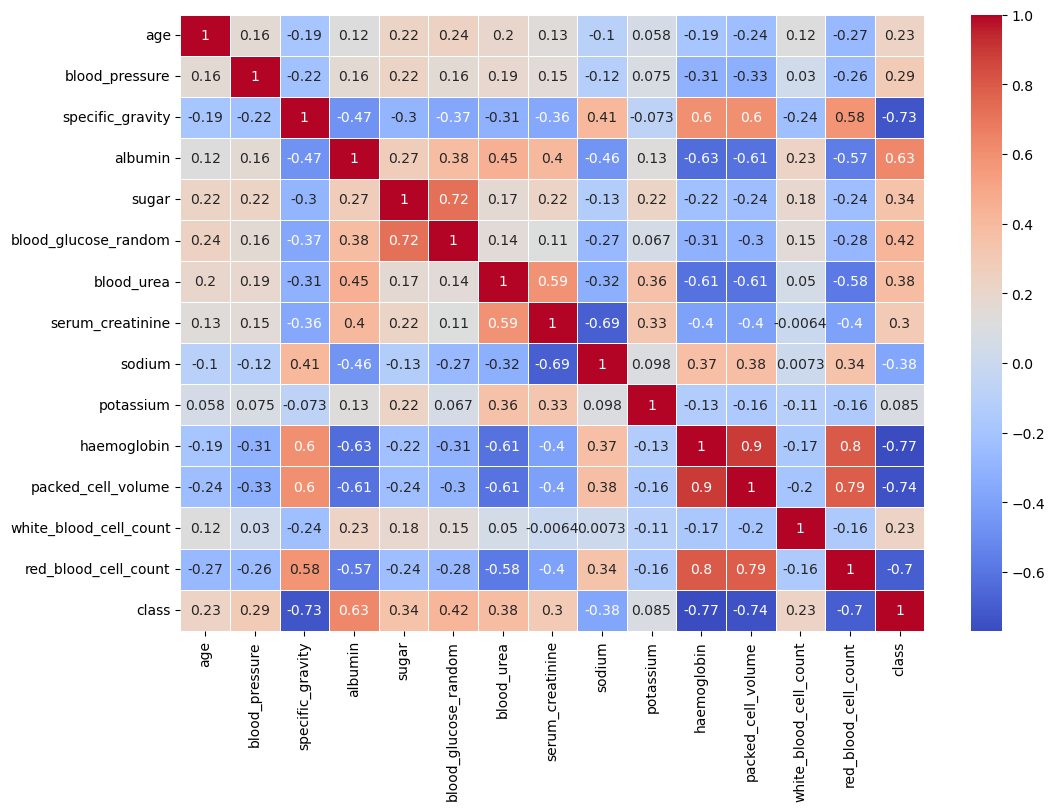

In [161]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

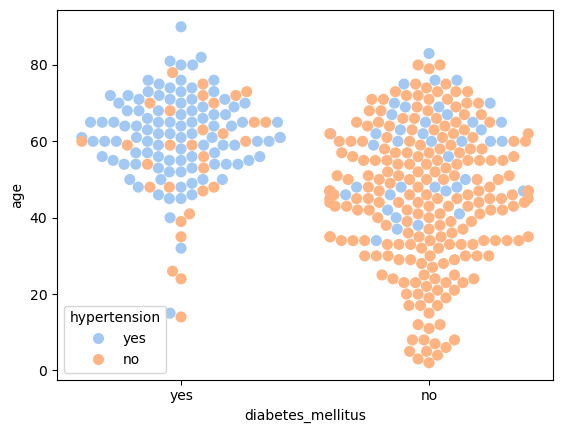

In [163]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

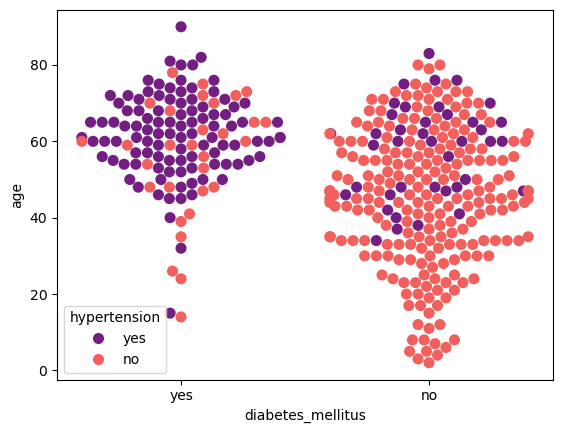

In [167]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='magma', size=8)

1. Swarm plot allows to see all overlapping data as well

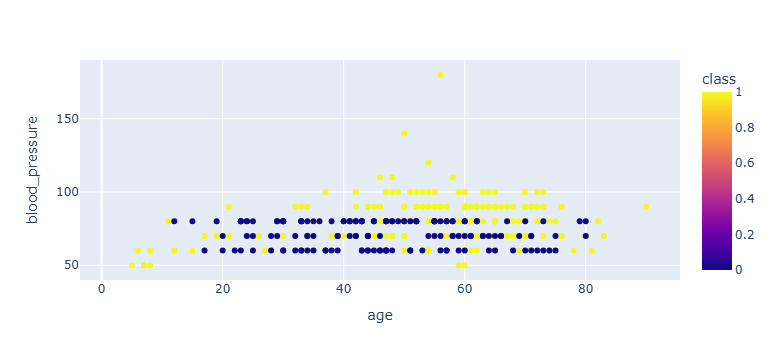

In [171]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class')
fig.show()

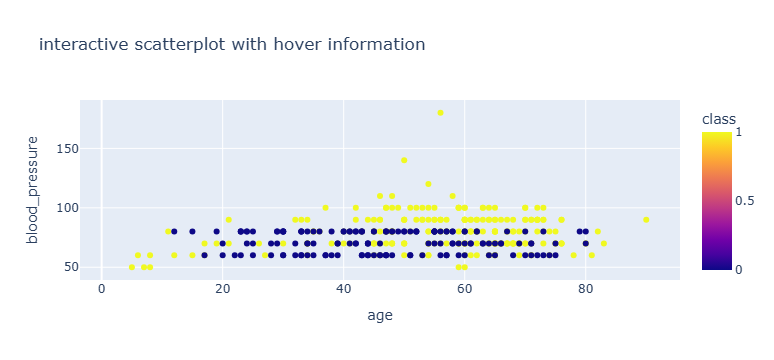

In [169]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data = ['serum_creatinine', 'haemoglobin'], title = "Interactive Scatterplot with Hover information")
fig.show()

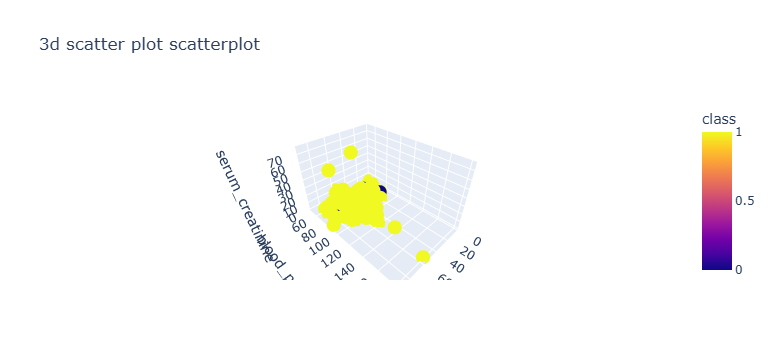

In [173]:
#3D Plots

fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure',z = 'serum_creatinine', color = 'class', title = "3d scatter plot scatterplot")
fig.show()

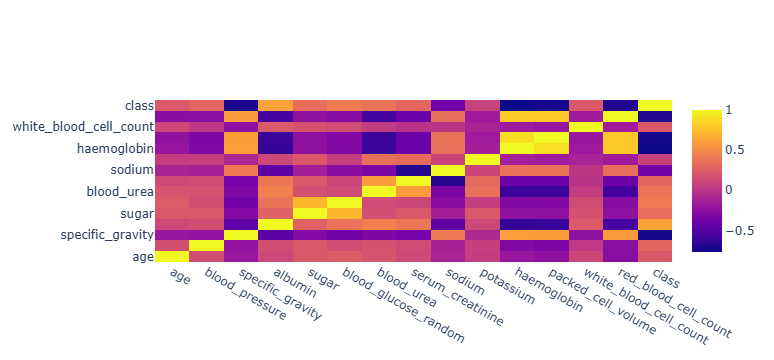

In [175]:
#Interactive plot

import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.values,
                          x = data_corr.columns,
                          y=data_corr.index))
fig.show()

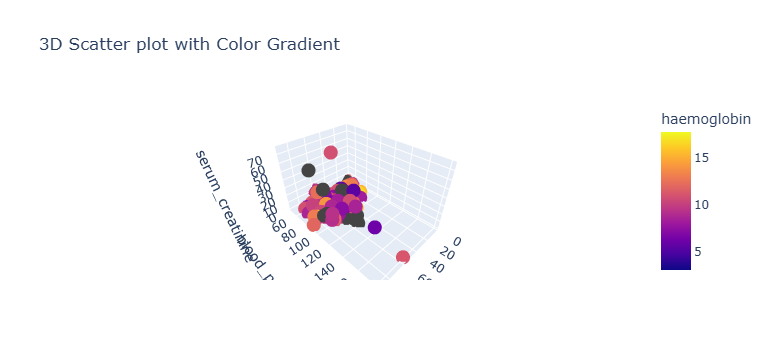

In [177]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()

In [181]:
#replace with median for numerical col
median_values = df[num_cols].median()
median_values

age                         55.00
blood_pressure              80.00
specific_gravity             1.02
albumin                      0.00
sugar                        0.00
blood_glucose_random       121.00
blood_urea                  42.00
serum_creatinine             1.30
sodium                     138.00
potassium                    4.40
haemoglobin                 12.65
packed_cell_volume          40.00
white_blood_cell_count    8000.00
red_blood_cell_count         4.80
dtype: float64

In [183]:
df[num_cols] = df[num_cols].fillna(median_values)

In [185]:
df[num_cols].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [189]:
mode_values = df.mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values)
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [191]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [193]:
#encoding >> converting object to numerical

from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [195]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 121.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  aanemia  class  
0           0        0      1  
1           0        0      1  
2           0        1      1  
3           1        1      1  
4           0        0      1  

[5 rows x 25 columns]

In [96]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')